In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
%reload_ext autoreload
%autoreload 2

import lightgbm as lgb
import time

from src import utils, features
import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib

from fastai.structured import *

basepath = os.path.expanduser('../')

## Parameters required to reconstruct experiment

In [3]:
def get_merge_filenames():
    filenames = ['application_',
             'current_application_',
             'bureau_',
             'prev_app_',
             'pos_cash_',
             'credit_', 
             'installments_',
             'prev_app_bureau_', 
             'prev_app_credit_', 
             'prev_app_installments_',
             'loan_stacking_',
             'feature_groups_',
             'prev_app_pos_cash_',
             'prev_app_pos_cash_credit_bal_',
             'prev_app_ohe_'
            ]
    
    return filenames

def get_cols_to_remove():
    COLS_TO_REMOVE = [
                  'SK_ID_CURR', 
                  'TARGET',
                  'OCCUPATION_TYPE__5',
                  'OCCUPATION_TYPE__-1',
                  'OCCUPATION_TYPE__11',
                  'OCCUPATION_TYPE__15',
                  'ORGANIZATION_TYPE__29',
                  'ORGANIZATION_TYPE__5',
                  'FLAG_OWN_REALTY',
                  'FLAG_DOCUMENT_21',
                  'ORGANIZATION_TYPE__21',
                  'FLAG_DOCUMENT_14',
                  'ORGANIZATION_TYPE__17',
                  'ORGANIZATION_TYPE__27',
                  'ORGANIZATION_TYPE__32',
                  'FLAG_DOCUMENT_16',
                  'ORGANIZATION_TYPE__47',
                  'FLAG_DOCUMENT_13',
                  'FLAG_DOCUMENT_11',
                  'ORGANIZATION_TYPE__40',
                  'ORGANIZATION_TYPE__23',
                  'ORGANIZATION_TYPE__14',
                  'diff_max_min_credit_term',
                  'ORGANIZATION_TYPE__1',
                  'ORGANIZATION_TYPE__9',
                  'OCCUPATION_TYPE__nan',
                  'ORGANIZATION_TYPE__41',
                  'OCCUPATION_TYPE__7',
                  'FLAG_MOBIL',
                  'ORGANIZATION_TYPE__18',
                  'ORGANIZATION_TYPE__38',
                  'ORGANIZATION_TYPE__44',
                  'FLAG_DOCUMENT_12',
                  'ORGANIZATION_TYPE__0',
                  'FLAG_DOCUMENT_2',
                  'ORGANIZATION_TYPE__13',
                  'OCCUPATION_TYPE__0',
                  'FLAG_DOCUMENT_4',
                  'OCCUPATION_TYPE__16',
                  'ORGANIZATION_TYPE__49',
                  'FLAG_DOCUMENT_6',
                  'FLAG_DOCUMENT_9',
                  'ORGANIZATION_TYPE__nan',
                  'OCCUPATION_TYPE__12',
                  'ORGANIZATION_TYPE__20',
                  'FLAG_CONT_MOBILE',
                  'ORGANIZATION_TYPE__37',
                  'ORGANIZATION_TYPE__45',
                  'FLAG_EMP_PHONE',
                  'FLAG_DOCUMENT_17',
                  'LIVE_REGION_NOT_WORK_REGION',
                  'OCCUPATION_TYPE__17',
                  'NAME_TYPE_SUITE',
                  'ORGANIZATION_TYPE__15',
                  'REG_REGION_NOT_LIVE_REGION',
                  'FLAG_DOCUMENT_10',
                  'ORGANIZATION_TYPE__3',
                  'OCCUPATION_TYPE__2',
                  'ORGANIZATION_TYPE__19',
                  'FLAG_DOCUMENT_19',
                  'AMT_REQ_CREDIT_BUREAU_DAY',
                  'credits_ended_bureau',
                  'ORGANIZATION_TYPE__8',
                  'ORGANIZATION_TYPE__16',
                  'FLAG_DOCUMENT_8',
                  'ORGANIZATION_TYPE__25',
                  'OCCUPATION_TYPE__6',
                  'NUM_NULLS_EXT_SCORES',
                  'ORGANIZATION_TYPE__48',
                  'ORGANIZATION_TYPE__53',
                  'ORGANIZATION_TYPE__10',
                  'FLAG_DOCUMENT_7',
                  'ORGANIZATION_TYPE__55',
                  'ORGANIZATION_TYPE__24',
                  'NAME_EDUCATION_TYPE__0',
                  'ORGANIZATION_TYPE__46',
                  'ELEVATORS_MODE',
                  'NAME_EDUCATION_TYPE__nan',
                  'ORGANIZATION_TYPE__22',
                  'ORGANIZATION_TYPE__50',
                  'REG_REGION_NOT_WORK_REGION',
                  'ORGANIZATION_TYPE__56',
                  'FLAG_DOCUMENT_5',
                  'FLAG_DOCUMENT_20',
                  'ORGANIZATION_TYPE__2',
                  'ORGANIZATION_TYPE__6',
                  'OCCUPATION_TYPE__13',
                  'ORGANIZATION_TYPE__52',
                  'FLAG_DOCUMENT_15',
                  'ORGANIZATION_TYPE__43',
                  'AMT_REQ_CREDIT_BUREAU_HOUR',
                  'NAME_HOUSING_TYPE',
                  'ORGANIZATION_TYPE__11',
                  'HOUSETYPE_MODE',
                  'EMERGENCYSTATE_MODE',
                  'ORGANIZATION_TYPE__28',
                  'NAME_EDUCATION_TYPE__2',
                  'ORGANIZATION_TYPE__4',
                  'OCCUPATION_TYPE__14',
                  'ORGANIZATION_TYPE__35',
                  'LIVE_CITY_NOT_WORK_CITY',
                  'num_diff_credits',
                  'ORGANIZATION_TYPE__51',
                  'REG_CITY_NOT_WORK_CITY',
                  'FLAG_EMAIL',
                  'ORGANIZATION_TYPE__57',
                  'NAME_HOUSING_TYPE__0',
                  'NAME_INCOME_TYPE__2',
                  'NAME_INCOME_TYPE__5',
                  'NAME_HOUSING_TYPE__nan',
                  'NAME_INCOME_TYPE__nan',
                  'NAME_INCOME_TYPE__0',
                  'NAME_INCOME_TYPE__6',
                  'NAME_CONTRACT_STATUS_3',
                  'NAME_INCOME_TYPE__3',
                  'diff_balance_curr_credit',
                  'ratio_min_installment_balance',
                  'NAME_HOUSING_TYPE__4',
                  'CODE_REJECT_REASON_5',
                  'CODE_REJECT_REASON_8',
                  'ORGANIZATION_TYPE__33',
                  'CODE_REJECT_REASON_0',
                  'OCCUPATION_TYPE__1',
                  'NAME_HOUSING_TYPE__5',
                  'sum_num_times_prolonged',
                  'NAME_GOODS_CATEGORY_13',
                  'NAME_GOODS_CATEGORY_4',
                  'NAME_GOODS_CATEGORY_26',
                  'PRODUCT_COMBINATION_-1',
                  'NAME_GOODS_CATEGORY_24',
                  'NAME_GOODS_CATEGORY_15',
                  'NAME_GOODS_CATEGORY_20',
                  'NAME_GOODS_CATEGORY_9',
                  'CODE_REJECT_REASON_6',
                  'NAME_GOODS_CATEGORY_6',
                  'NAME_GOODS_CATEGORY_0',
                  'num_high_int_no_info_loans',
                  'NAME_HOUSING_TYPE__2',
                  'NAME_GOODS_CATEGORY_14',
                  'NAME_GOODS_CATEGORY_17',
                  'PRODUCT_COMBINATION_16',
                  'PRODUCT_COMBINATION_15',
                  'OCCUPATION_TYPE__10',
                  'PRODUCT_COMBINATION_14',
                  'NAME_GOODS_CATEGORY_1',
                  'NAME_GOODS_CATEGORY_12',
                  'NAME_GOODS_CATEGORY_21',
                  'NAME_GOODS_CATEGORY_25',
                  'OCCUPATION_TYPE__9',
                  'NAME_GOODS_CATEGORY_10',
                  'NAME_GOODS_CATEGORY_16',
                  'NAME_GOODS_CATEGORY_8'
                ]
    
    return COLS_TO_REMOVE

def get_freq_encoding_cols():
    FREQ_ENCODING_COLS = [
                          'ORGANIZATION_OCCUPATION',
                          'age_emp_categorical',
                          'age_occupation'
                         ]
    
    return FREQ_ENCODING_COLS

def get_ohe_cols():
    ONE_HOT_COLS = [
                      'ORGANIZATION_TYPE',
                      'OCCUPATION_TYPE',
                      'NAME_EDUCATION_TYPE',
                      'NAME_HOUSING_TYPE',
                      'NAME_INCOME_TYPE'
                   ]
    
    return ONE_HOT_COLS

In [4]:
def load_data_parameters(model_filename):
    # Filenames to merge
    if os.path.exists(os.path.join(basepath, f'models/{model_filename}_filenames.pkl')):
        filenames = joblib.load(os.path.join(basepath, f'models/{MODEL_FILENAME}_filenames.pkl'))
    else:
        filenames = get_merge_filenames()
        joblib.dump(filenames, os.path.join(basepath, f'models/{model_filename}_filenames.pkl'))
        
    # Columns to remove from model
    if os.path.exists(os.path.join(basepath, f'models/{model_filename}_cols_to_remove.pkl')):
        cols_to_remove = joblib.load(os.path.join(basepath, f'models/{model_filename}_cols_to_remove.pkl'))
    else:
        cols_to_remove = get_cols_to_remove()
        joblib.dump(cols_to_remove, os.path.join(basepath, f'models/{model_filename}_cols_to_remove.pkl'))
    
    # Columns to apply frequency encoding
    if os.path.exists(os.path.join(basepath, f'models/{model_filename}_freq_encoding.pkl')):
        freq_encode_cols = joblib.load(os.path.join(basepath, f'models/{model_filename}_freq_encoding.pkl'))
    else:
        freq_encode_cols = get_freq_encoding_cols()
        joblib.dump(freq_encode_cols, os.path.join(basepath, f'models/{model_filename}_freq_encoding.pkl'))
    
    # Columns to apply one hot encoding
    if os.path.exists(os.path.join(basepath, f'models/{model_filename}_ohe_encoding.pkl')):
        ohe_encode_cols = joblib.load(os.path.join(basepath, f'models/{model_filename}_ohe_encoding.pkl'))
    else:
        ohe_encode_cols = get_ohe_cols()
        joblib.dump(ohe_encode_cols, os.path.join(basepath, f'models/{model_filename}_ohe_encoding.pkl'))
    
    return filenames, cols_to_remove, freq_encode_cols, ohe_encode_cols

def load_model_parameters(model_filename):
    model_params = None
    
    # Model parameters
    if os.path.exists(os.path.join(basepath, f'models/{model_filename}_model_params.pkl')):
        model_params = joblib.load(os.path.join(basepath, f'models/{MODEL_FILENAME}_model_params.pkl'))
        
    return model_params

In [5]:
MODEL_FILENAME = 'v65'
filenames, COLS_TO_REMOVE, FREQ_ENCODING_COLS, ONE_HOT_COLS = load_data_parameters(MODEL_FILENAME)
model_params   = load_model_parameters(MODEL_FILENAME)

## Data Preparation Process

## Process

1. Merge all datasets.
1. Do Feature Engineeering.
1. Create a sample.
1. Run cross-validation on sample.

In [6]:
def merge_datasets(filenames):
    """
    1. Need filenames of pickled training and test dataframes. 
    2. Merge all training pickled datasets.
    """
    
    # training dataframe
    train = []
    
    for filename in filenames:
        tmp = pd.read_pickle(os.path.join(basepath, f'data/interim/dataset1/{filename}train.pkl'))
        tmp.index = np.arange(len(tmp))
        
        train.append(tmp)
        
    # test dataframe
    test = []
    
    for filename in filenames:
        tmp = pd.read_pickle(os.path.join(basepath, f'data/interim/dataset1/{filename}test.pkl'))
        tmp.index = np.arange(len(tmp))
        
        test.append(tmp)
    
    return pd.concat(train, axis=1), pd.concat(test, axis=1)

In [7]:
%time train, test = merge_datasets(filenames)

CPU times: user 523 ms, sys: 690 ms, total: 1.21 s
Wall time: 8.94 s


In [8]:
print('Training shape: {}'.format(train.shape))
print('Test shape: {}'.format(test.shape))

Training shape: (307511, 427)
Test shape: (48744, 427)


### Feature Engineering

In [9]:
# features to be implemented

def feature_interaction(data, key, agg_feature, agg_func, agg_func_name):
    key_name = '_'.join(key)
    
    tmp = data.groupby(key)[agg_feature].apply(agg_func)\
              .reset_index()\
              .rename(columns={agg_feature: f'{agg_func_name}_{key_name}_{agg_feature}'})
    
    data.loc[:, f'{agg_func_name}_{key_name}_{agg_feature}'] = data.loc[:, key]\
                                                        .merge(tmp, on=key, how='left')[f'{agg_func_name}_{key_name}_{agg_feature}']
    
    return data
    

def fe(train, test):
    # concat train and test
    ntrain     = len(train)
    data       = pd.concat((train, test))
    data.index = np.arange(len(data))

    del train, test
    gc.collect()
    
    for col in data.select_dtypes(include=['category']).columns:
        data[col] = data[col].cat.codes
    
    # concatenate OCCUPATION TYPE AND ORGANIZATION TYPE
    data.loc[:, 'ORGANIZATION_OCCUPATION'] = pd.factorize(data.ORGANIZATION_TYPE.astype(np.str) +\
                                                          data.OCCUPATION_TYPE.astype(np.str)
                                                         )[0]

    # interaction between total debt to income and (annuity / credit)
    data.loc[:, 'debt_income_to_annuity_credit'] = data.total_debt_to_income / data.ratio_annuity_credit

    # interaction between days birth and ratio of annuity to credit
    data.loc[:, 'add_days_birth_annuity_credit'] = data.DAYS_BIRTH + data.ratio_annuity_credit

    # interaction between ratio of annuity to credit with external source 2 score
    data.loc[:, 'mult_annuity_credit_ext_source_2']  = data.ratio_annuity_credit * data.EXT_SOURCE_2
    data.loc[:, 'ratio_annuity_credit_ext_source_2'] = data.ratio_annuity_credit / data.EXT_SOURCE_2.map(np.log1p)

    data.loc[:, 'mult_annuity_credit_ext_source_1']  = data.ratio_annuity_credit * data.EXT_SOURCE_1
    data.loc[:, 'ratio_annuity_credit_ext_source_1'] = data.ratio_annuity_credit / data.EXT_SOURCE_1.map(np.log1p)

    data.loc[:, 'mult_annuity_credit_ext_source_3']  = data.ratio_annuity_credit * data.EXT_SOURCE_3
    data.loc[:, 'ratio_annuity_credit_ext_source_3'] = data.ratio_annuity_credit / data.EXT_SOURCE_3.map(np.log1p)


    # interaction between ratio of annuity to credit with total amount paid in installments
    data.loc[:, 'mult_annuity_credit_amt_payment_sum'] = data.ratio_annuity_credit * data.AMT_PAYMENT_sum

    # interaction between total amount paid in installments and delay in installments
    data.loc[:, 'mult_amt_payment_sum_delay_installment'] = data.AMT_PAYMENT_sum * data.delay_in_installment_payments

    # interaction between credit / annuity and age
    data.loc[:, 'diff_credit_annuity_age'] = (data.AMT_CREDIT / data.AMT_ANNUITY) - (-data.DAYS_BIRTH / 365)

    # interaction between ext_3 and age
    data.loc[:, 'ext_3_age'] = data.EXT_SOURCE_3 * (-data.DAYS_BIRTH / 365)

    # interaction between ext_2 and age
    data.loc[:, 'ext_2_age'] = data.EXT_SOURCE_2 * (-data.DAYS_BIRTH / 365)

    # interaction between rate and external source 2
    data.loc[:, 'add_rate_ext_2'] = (data.AMT_CREDIT / data.AMT_ANNUITY) + data.EXT_SOURCE_2

    # interaction between rate and age
    data.loc[:, 'add_rate_age']  = (data.AMT_CREDIT / data.AMT_ANNUITY) + (-data.DAYS_BIRTH / 365)

    # interaction between age and employed and external score 2
    data.loc[:, 'add_mult_age_employed_ext_2'] = ((-data.DAYS_BIRTH / 365) +\
                                                 (-data.DAYS_EMPLOYED.replace({365243: np.nan}))) *\
                                                 (data.EXT_SOURCE_2)


    # combine ratio annuity credit, region populative relative and ext source 2
    data.loc[:, 'rate_annuity_region_ext_source_2'] = data.ratio_annuity_credit * data.REGION_POPULATION_RELATIVE * data.EXT_SOURCE_2    
    data.loc[:, 'region_ext_source_3'] = data.REGION_POPULATION_RELATIVE * data.EXT_SOURCE_3

    # Relationship between AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_YEAR
    data.loc[:, 'ratio_check_hour_to_year'] = data.AMT_REQ_CREDIT_BUREAU_HOUR.div(data.AMT_REQ_CREDIT_BUREAU_YEAR)

    # Relationship between Income and ratio annuity credit
    data.loc[:, 'mult_ratio_income'] = (data.ratio_annuity_credit * data.AMT_INCOME_TOTAL).map(np.log1p)
    data.loc[:, 'div_ratio_income']  = (data.AMT_INCOME_TOTAL / data.ratio_annuity_credit).map(np.log1p)
    
    
    # Gender, Education and Ext scores
    data = feature_interaction(data, ['CODE_GENDER', 'NAME_EDUCATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    data = feature_interaction(data, ['CODE_GENDER', 'NAME_EDUCATION_TYPE'], 'EXT_SOURCE_2', np.var, 'var')
    
    # Gender, Occupation and Ext scores    
    data = feature_interaction(data, ['CODE_GENDER', 'OCCUPATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    
    # Gender, Organization and Ext score
    data = feature_interaction(data, ['CODE_GENDER', 'ORGANIZATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    
    # Income, Occupation and Ext Score
    data = feature_interaction(data, ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    
    # Occupation and Organization and Ext Score
    data = feature_interaction(data, ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    
    # Income, Education and Ext score
    data = feature_interaction(data, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], 'EXT_SOURCE_2', np.mean, 'mean')
    
    ####################################################
    #          FEATURE IN QUESTION                     #
    ####################################################
    
    ## NOTE: SHOULD ALWAYS BE ABOVE FREQUENCY ENCODING AND ONE HOT ENCODING
    # AS THOSE PROCESSING TECHNIQUES REMOVE FEATURES FROM THE DATASET.
        
    #######################################################################
    #                   Categorical Features                              #
    #######################################################################
    
    # frequency encoding of some of the categorical variables.
    data = features.frequency_encoding(data, FREQ_ENCODING_COLS)
    
    # one hot encode columns
    data = features.one_hot_encoding(data, ONE_HOT_COLS)
    
    
    
    #####################################################
    #     Split into train and test part                #
    #####################################################
    
    train = data.iloc[:ntrain]
    test  = data.iloc[ntrain:]
    
    del data
    gc.collect()
    
    train.index = np.arange(len(train))
    test.index  = np.arange(len(test))
    
    return train, test

In [10]:
%%time

train, test = fe(train, test)

CPU times: user 11.7 s, sys: 5.86 s, total: 17.5 s
Wall time: 18.9 s


In [11]:
print('Training shape: {}'.format(train.shape))
print('Validation shape: {}'.format(test.shape))

Training shape: (307511, 552)
Validation shape: (48744, 552)


## Always work with a sample.

In [12]:
# create a sample

np.random.seed(SEED)

ntrain    = int(.5 * len(train))
train_sub = train.sample(n=ntrain)

print('Size of sample: {}'.format(train_sub.shape))

Size of sample: (153755, 552)


In [13]:
# save to disk
os.makedirs(os.path.join(basepath, 'data/interim/sample'), exist_ok=True)
train_sub.to_hdf(os.path.join(basepath, 'data/interim/sample/train_sub.h5'), key='sample')

In [6]:
# load sample from disk
train_sub = pd.read_hdf(os.path.join(basepath, 'data/interim/sample/train_sub.h5'), key='sample')

### RF

In [19]:
%%time

train_sub   = train_sub.replace([np.inf, -np.inf], np.nan)
dtr, y, nas = proc_df(train_sub, 'TARGET', skip_flds=['SK_ID_CURR'])

del train_sub
gc.collect();

CPU times: user 36.3 ms, sys: 24.1 ms, total: 60.4 ms
Wall time: 60.3 ms


In [8]:
# training and holdout set
X_train, X_valid, y_train, y_valid = train_test_split(dtr, 
                                                      y, 
                                                      test_size=.3, 
                                                      random_state=SEED)

In [153]:
%%time

m = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=3, max_features='log2', random_state=SEED, n_jobs=-1)
m.fit(X_train, y_train)
train_preds = m.predict_proba(X_train)[:, 1]
hold_preds  = m.predict_proba(X_valid)[:, 1]

print('Train AUC: {}'.format(roc_auc_score(y_train, train_preds)))
print('Holdout AUC: {}'.format(roc_auc_score(y_valid, hold_preds)))

Train AUC: 0.7526713549065919
Holdout AUC: 0.7405700961597593
CPU times: user 15 s, sys: 2.05 s, total: 17.1 s
Wall time: 13.8 s


#### Model Driven EDA

In [18]:
def get_preds(t): return t.predict_proba(X_valid)[:, 1]
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 48 ms, sys: 160 ms, total: 208 ms
Wall time: 2min 33s


(0.05935837522267551, 0.01456679528253904)

In [19]:
# save predictions from multiple trees to disk
np.save(os.path.join(basepath, 'data/interim/sample/preds.npy'), arr=preds)

In [9]:
# load predictions from disk
preds = np.load(os.path.join(basepath, 'data/interim/sample/preds.npy'))

In [55]:
[col for col in X_valid.columns if x[col].nunique() < 10 and x[col].nunique() > 2]

['AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WALLSMATERIAL_MODE',
 'WEEKDAY_APPR_PROCESS_START',
 'NUM_NULLS_EXT_SCORES',
 'num_diff_credits',
 'sum_num_times_prolonged',
 'num_high_int_no_info_loans',
 'num_diff_reasons_rejections',
 'most_freq_rejection_reason',
 'MONTHS_BALANCE_amax',
 'own_house_car',
 'num_times_region_false_info',
 'NAME_GOODS_CATEGORY_6',
 'NAME_GOODS_CATEGORY_26',
 'NAME_GOODS_CATEGORY_3',
 'NAME_GOODS_CATEGORY_24',
 'PRODUCT_COMBINATION_12',
 'NAME_GOODS_CATEGORY_21',
 'NAME_GOODS_CATEGORY_8',
 'CODE_REJECT_REASON_8',
 'NAME_GOODS_CATEGORY_23',
 'NAME_GOODS_CATEGORY_17',
 'NAME_GOODS_CATEGORY_9',
 'NAME_GOODS_CATEGORY_18',
 'CODE_REJECT_REASON_6',
 'NAME_GOODS_CATEGORY_25',
 'NAME_GOODS_CATEG

#### NAME_FAMILY_STATUS

In [29]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

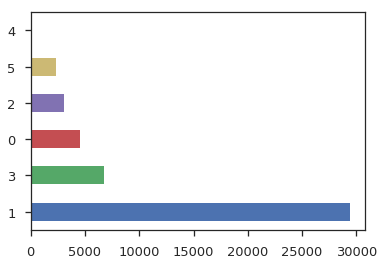

In [30]:
x.NAME_FAMILY_STATUS.value_counts().plot.barh();

In [31]:
flds = ['NAME_FAMILY_STATUS', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('NAME_FAMILY_STATUS', as_index=False).mean()
summ

,NAME_FAMILY_STATUS,TARGET,pred,pred_std
0,0,0.103088,0.084767,0.037066
1,1,0.074890,0.080135,0.034852
2,2,0.080139,0.077719,0.033632
3,3,0.096008,0.086495,0.038089
4,4,0.000000,0.058402,0.026314
5,5,0.053162,0.070011,0.029872


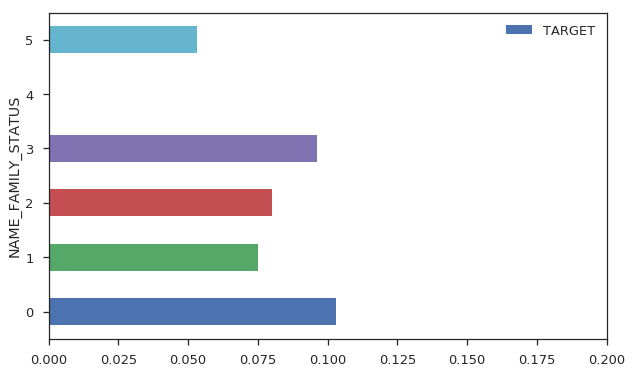

In [39]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('NAME_FAMILY_STATUS', 'TARGET', 'barh', xlim=(0,.2), ax=ax);

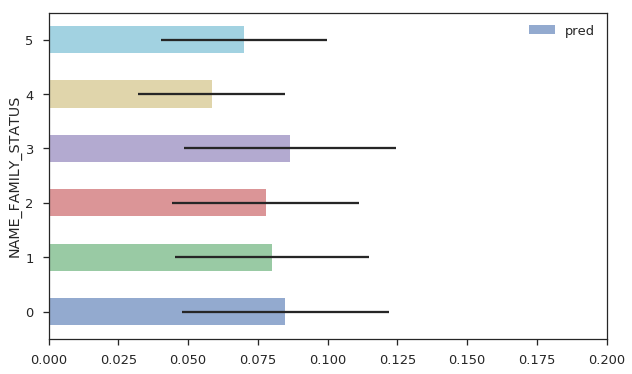

In [40]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('NAME_FAMILY_STATUS', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.2), ax=ax);

#### Ratio of annuity to credit

In [50]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

x.loc[:, 'ratio_annuity_credit_cat'] = pd.cut(x.ratio_annuity_credit, bins=10)

In [51]:
flds = ['ratio_annuity_credit_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('ratio_annuity_credit_cat', as_index=False).mean()
summ

,ratio_annuity_credit_cat,TARGET,pred,pred_std
0,"(0.022, 0.0323]",0.061554,0.074590,0.032521
1,"(0.0323, 0.0425]",0.067444,0.075755,0.032786
2,"(0.0425, 0.0528]",0.088318,0.082640,0.036101
3,"(0.0528, 0.063]",0.086853,0.083501,0.035865
4,"(0.063, 0.0733]",0.103455,0.087801,0.038190
5,"(0.0733, 0.0835]",0.140259,0.095227,0.042414
6,"(0.0835, 0.0937]",0.108887,0.090676,0.040526
7,"(0.0937, 0.104]",0.025909,0.068909,0.028689
8,"(0.104, 0.114]",0.060394,0.084796,0.037348
9,"(0.114, 0.124]",0.113037,0.097438,0.046575


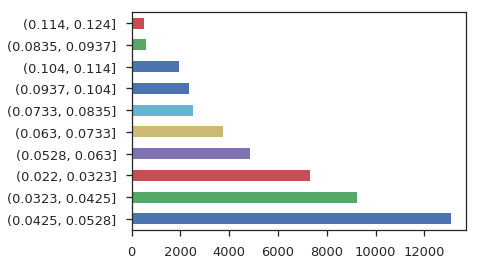

In [54]:
x.ratio_annuity_credit_cat.value_counts().plot.barh();

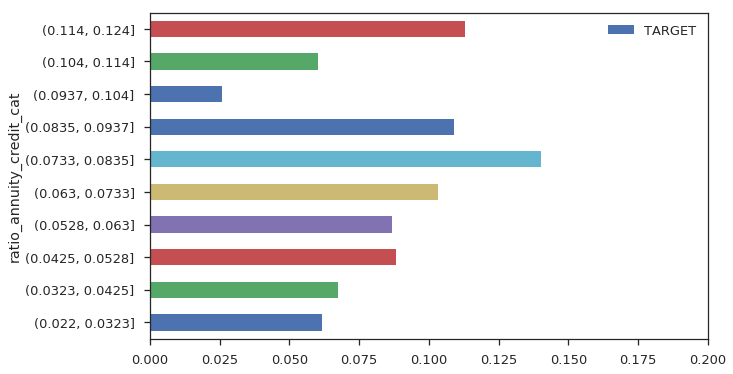

In [52]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('ratio_annuity_credit_cat', 'TARGET', 'barh', xlim=(0,.2), ax=ax);

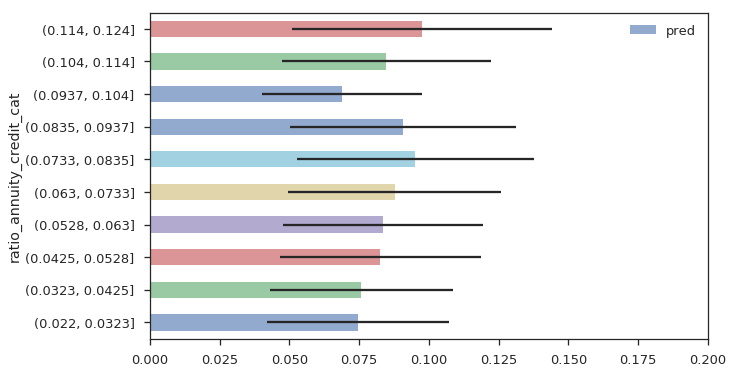

In [53]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('ratio_annuity_credit_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.2), ax=ax);

#### AMT_PAYMENT_sum

In [58]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

x.loc[:, 'AMT_PAYMENT_sum_cat'] = pd.cut(x.AMT_PAYMENT_sum, bins=6)

In [59]:
flds = ['AMT_PAYMENT_sum_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('AMT_PAYMENT_sum_cat', as_index=False).mean()
summ

,AMT_PAYMENT_sum_cat,TARGET,pred,pred_std
0,"(-0.0163, 2.722]",0.000000,0.075795,0.024293
1,"(2.722, 5.444]",0.000000,0.076665,0.059321
2,"(5.444, 8.166]",0.285645,0.087307,0.041829
3,"(8.166, 10.887]",0.117371,0.087077,0.039394
4,"(10.887, 13.609]",0.079590,0.080781,0.034801
5,"(13.609, 16.331]",0.069946,0.079137,0.035104


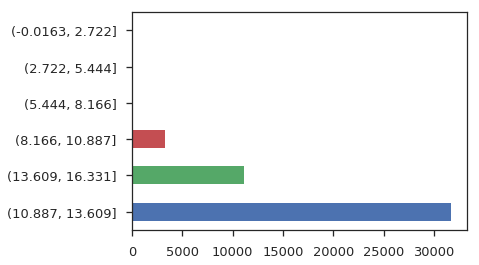

In [63]:
x.AMT_PAYMENT_sum_cat.value_counts().plot.barh();

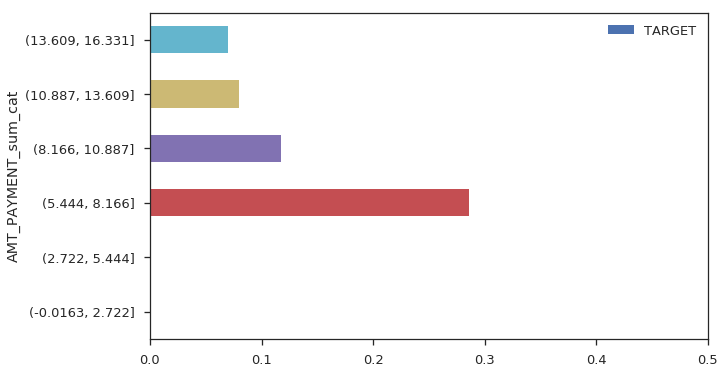

In [65]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('AMT_PAYMENT_sum_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

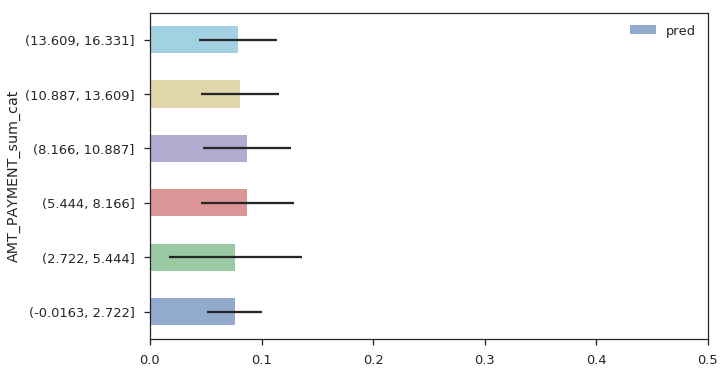

In [66]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('AMT_PAYMENT_sum_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### min_diff_actual_decided

In [76]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

x.loc[:, 'min_diff_actual_decided_cat'] = pd.cut(x.min_diff_actual_decided, bins=10)

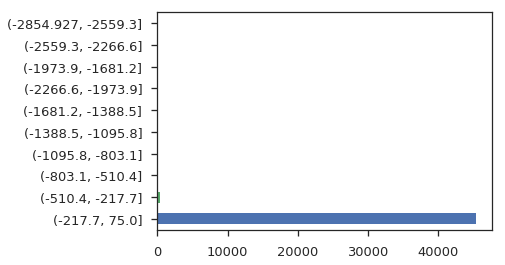

In [77]:
x.min_diff_actual_decided_cat.value_counts().plot.barh();

In [79]:
flds = ['min_diff_actual_decided_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('min_diff_actual_decided_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                           'pred': np.mean,
                                                                           'pred_std': np.mean
                                                                          })
summ

min_diff_actual_decided_cat    TARGET               pred  pred_std
                                   mean      len      mean      mean
0        (-2854.927, -2559.3]  0.000000      4.0  0.074271  0.036076
1          (-2559.3, -2266.6]  0.199951      5.0  0.069876  0.030850
2          (-2266.6, -1973.9]  0.157837     19.0  0.089370  0.036869
3          (-1973.9, -1681.2]  0.000000     16.0  0.075719  0.031517
4          (-1681.2, -1388.5]  0.081055     37.0  0.080513  0.035721
5          (-1388.5, -1095.8]  0.068176     44.0  0.071218  0.028993
6           (-1095.8, -803.1]  0.069763     86.0  0.077834  0.032424
7            (-803.1, -510.4]  0.067932    103.0  0.078044  0.031958
8            (-510.4, -217.7]  0.103760    347.0  0.083635  0.035693
9              (-217.7, 75.0]  0.079834  45472.0  0.080838  0.035221

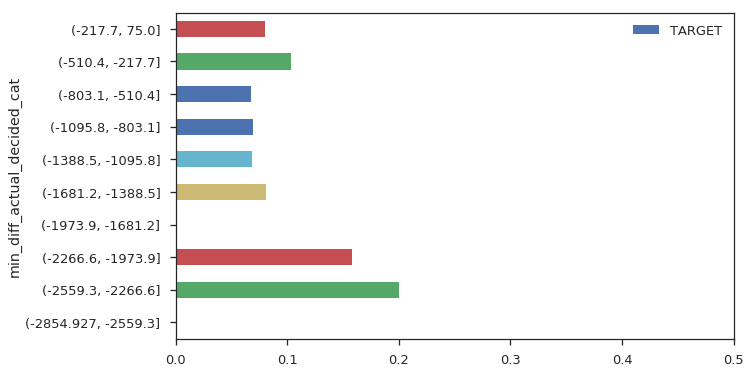

In [80]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ = x[flds].groupby('min_diff_actual_decided_cat', as_index=False).mean()
summ.plot('min_diff_actual_decided_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

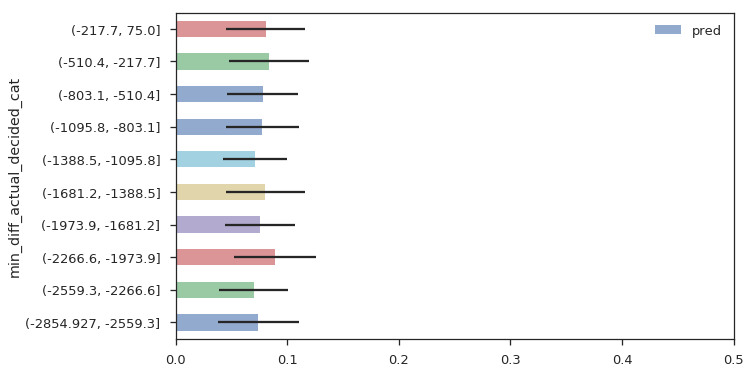

In [81]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('min_diff_actual_decided_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### AMT_CREDIT_SUM_max

In [98]:
mask = X_valid.AMT_CREDIT_SUM_max < 3375000.0

x                  = X_valid[mask].copy()
x.loc[:, 'TARGET'] = y_valid[mask]

x['pred_std'] = np.std(preds, axis=0)[mask.values]
x['pred']     = np.mean(preds, axis=0)[mask.values]

x.loc[:, 'AMT_CREDIT_SUM_max_cat'] = pd.cut(x.AMT_CREDIT_SUM_max, bins=10)

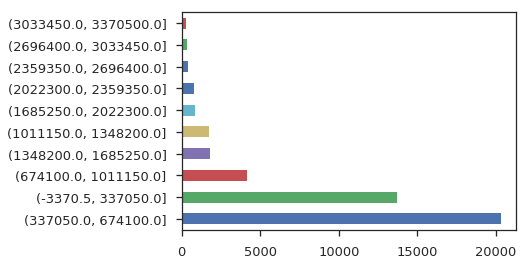

In [100]:
x.AMT_CREDIT_SUM_max_cat.value_counts().plot.barh();

In [101]:
flds = ['AMT_CREDIT_SUM_max_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('AMT_CREDIT_SUM_max_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

AMT_CREDIT_SUM_max_cat    TARGET               pred  pred_std
                               mean      len      mean      mean
0     (-3370.5, 337050.0]  0.080750  13696.0  0.082824  0.036724
1    (337050.0, 674100.0]  0.080383  20288.0  0.079316  0.033284
2   (674100.0, 1011150.0]  0.083801   4188.0  0.082135  0.037048
3  (1011150.0, 1348200.0]  0.087646   1769.0  0.082412  0.037259
4  (1348200.0, 1685250.0]  0.081909   1795.0  0.081695  0.037117
5  (1685250.0, 2022300.0]  0.079956    863.0  0.082399  0.037597
6  (2022300.0, 2359350.0]  0.082520    812.0  0.080317  0.036020
7  (2359350.0, 2696400.0]  0.070740    424.0  0.081544  0.037779
8  (2696400.0, 3033450.0]  0.073120    342.0  0.080634  0.037261
9  (3033450.0, 3370500.0]  0.073669    258.0  0.078601  0.035494

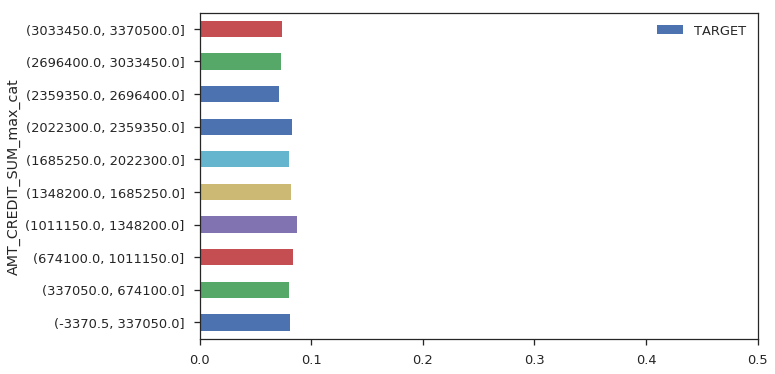

In [102]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ = x[flds].groupby('AMT_CREDIT_SUM_max_cat', as_index=False).mean()
summ.plot('AMT_CREDIT_SUM_max_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

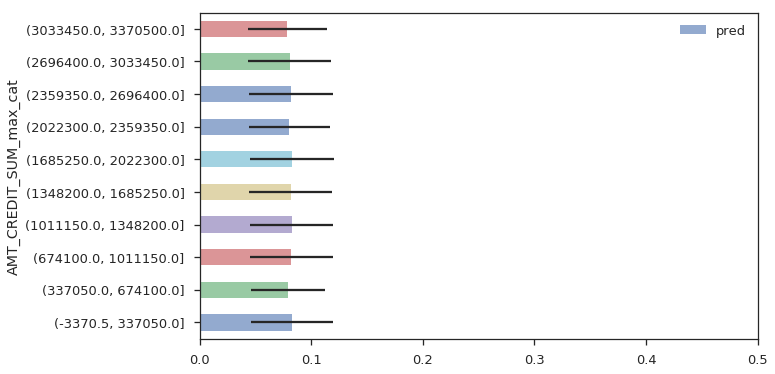

In [103]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('AMT_CREDIT_SUM_max_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

In [106]:
mask = X_valid.AMT_CREDIT_SUM_max > 3375000.0

x                  = X_valid[mask].copy()
x.loc[:, 'TARGET'] = y_valid[mask]

x['pred_std'] = np.std(preds, axis=0)[mask.values]
x['pred']     = np.mean(preds, axis=0)[mask.values]

x.loc[:, 'AMT_CREDIT_SUM_max_cat'] = pd.cut(x.AMT_CREDIT_SUM_max, bins=5)

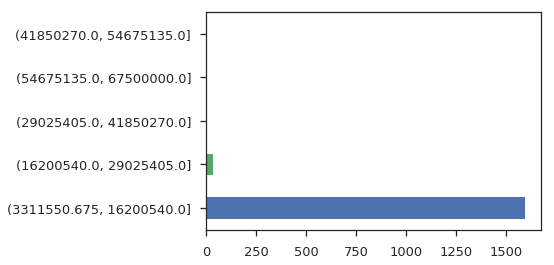

In [107]:
x.AMT_CREDIT_SUM_max_cat.value_counts().plot.barh();

In [108]:
flds = ['AMT_CREDIT_SUM_max_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('AMT_CREDIT_SUM_max_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

AMT_CREDIT_SUM_max_cat    TARGET              pred  pred_std
                                  mean     len      mean      mean
0  (3311550.675, 16200540.0]  0.051971  1597.0  0.076809  0.034426
1   (16200540.0, 29025405.0]  0.030304    33.0  0.075814  0.036086
2   (29025405.0, 41850270.0]  0.000000     5.0  0.076077  0.037242
3   (41850270.0, 54675135.0]  0.000000     1.0  0.083144  0.030239
4   (54675135.0, 67500000.0]  0.000000     2.0  0.078430  0.027966

#### add_rate_ext_2

In [109]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

x.loc[:, 'add_rate_ext_2_cat'] = pd.cut(x.add_rate_ext_2, bins=10)

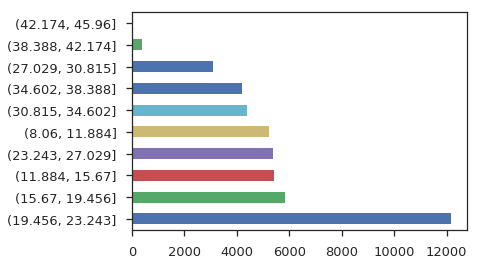

In [110]:
x.add_rate_ext_2_cat.value_counts().plot.barh();

In [111]:
flds = ['add_rate_ext_2_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('add_rate_ext_2_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

add_rate_ext_2_cat    TARGET               pred  pred_std
                          mean      len      mean      mean
0     (8.06, 11.884]  0.054962   5240.0  0.079481  0.034758
1    (11.884, 15.67]  0.127319   5412.0  0.092777  0.040872
2    (15.67, 19.456]  0.087402   5836.0  0.083840  0.036152
3   (19.456, 23.243]  0.089722  12160.0  0.083043  0.036276
4   (23.243, 27.029]  0.057648   5396.0  0.074673  0.031901
5   (27.029, 30.815]  0.069641   3088.0  0.075552  0.033025
6   (30.815, 34.602]  0.082153   4396.0  0.079553  0.035518
7   (34.602, 38.388]  0.050507   4196.0  0.071338  0.030342
8   (38.388, 42.174]  0.032104    405.0  0.064071  0.027010
9    (42.174, 45.96]  0.000000      3.0  0.096956  0.050820

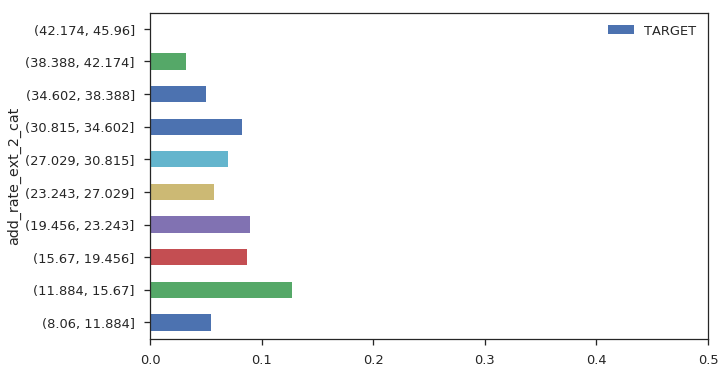

In [112]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ = x[flds].groupby('add_rate_ext_2_cat', as_index=False).mean()
summ.plot('add_rate_ext_2_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

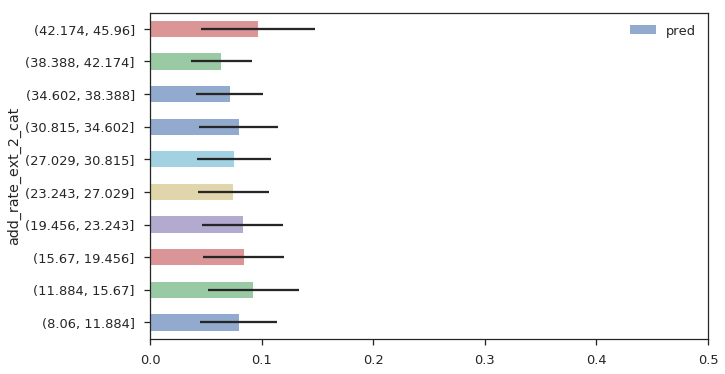

In [113]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('add_rate_ext_2_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### annuity_to_total_income

In [117]:
mask = x.annuity_to_total_income < 0.585

x                  = X_valid[mask].copy()
x.loc[:, 'TARGET'] = y_valid[mask]

x['pred_std'] = np.std(preds, axis=0)[mask.values]
x['pred']     = np.mean(preds, axis=0)[mask.values]

x.loc[:, 'annuity_to_total_income_cat'] = pd.cut(x.annuity_to_total_income, bins=10)

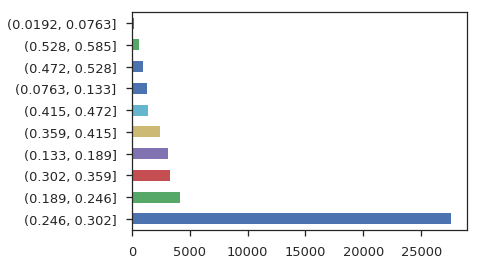

In [119]:
x.annuity_to_total_income_cat.value_counts().plot.barh();

In [120]:
flds = ['annuity_to_total_income_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('annuity_to_total_income_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

annuity_to_total_income_cat    TARGET               pred  pred_std
                                   mean      len      mean      mean
0            (0.0192, 0.0763]  0.062805    191.0  0.084557  0.039230
1             (0.0763, 0.133]  0.068665   1354.0  0.085091  0.038778
2              (0.133, 0.189]  0.084778   3148.0  0.085600  0.038482
3              (0.189, 0.246]  0.091431   4156.0  0.084075  0.037566
4              (0.246, 0.302]  0.078430  27536.0  0.080024  0.034558
5              (0.302, 0.359]  0.087219   3256.0  0.081024  0.035169
6              (0.359, 0.415]  0.086243   2458.0  0.079848  0.033932
7              (0.415, 0.472]  0.078857   1357.0  0.078624  0.034231
8              (0.472, 0.528]  0.069519    949.0  0.078875  0.034470
9              (0.528, 0.585]  0.054016    611.0  0.077120  0.032788

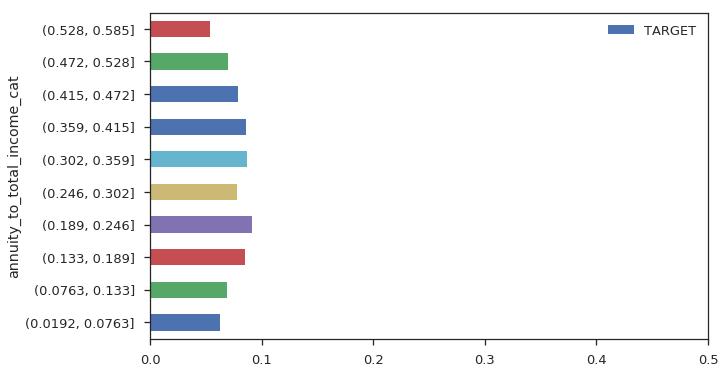

In [123]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ    = x[flds].groupby('annuity_to_total_income_cat', as_index=False).mean()
summ.plot('annuity_to_total_income_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

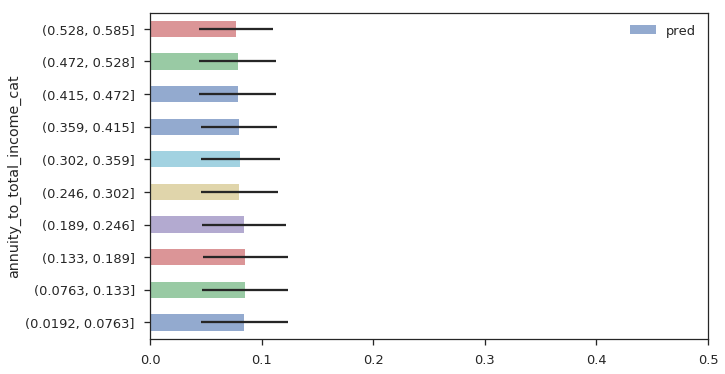

In [124]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('annuity_to_total_income_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### ratio_debt_credit_sum

In [127]:
mask = x.ratio_debt_credit_sum < 1.376
x                  = X_valid[mask].copy()
x.loc[:, 'TARGET'] = y_valid[mask]

x['pred_std'] = np.std(preds, axis=0)[mask.values]
x['pred']     = np.mean(preds, axis=0)[mask.values]

x.loc[:, 'ratio_debt_credit_sum_cat'] = pd.cut(x.ratio_debt_credit_sum, bins=10)

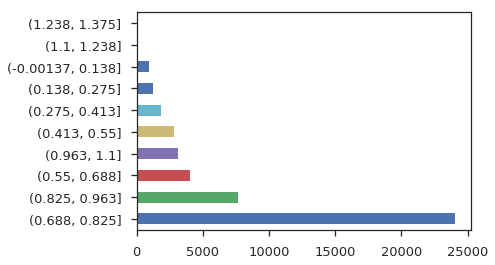

In [128]:
x.ratio_debt_credit_sum_cat.value_counts().plot.barh();

In [129]:
flds = ['ratio_debt_credit_sum_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('ratio_debt_credit_sum_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

ratio_debt_credit_sum_cat    TARGET               pred  pred_std
                                 mean      len      mean      mean
0         (-0.00137, 0.138]  0.043243    948.0  0.073015  0.031699
1            (0.138, 0.275]  0.062561   1263.0  0.075151  0.032874
2            (0.275, 0.413]  0.056915   1880.0  0.077159  0.033664
3             (0.413, 0.55]  0.050262   2824.0  0.077033  0.034225
4             (0.55, 0.688]  0.057220   4000.0  0.081008  0.036618
5            (0.688, 0.825]  0.074646  24080.0  0.078080  0.032718
6            (0.825, 0.963]  0.108459   7680.0  0.088327  0.040446
7              (0.963, 1.1]  0.131470   3140.0  0.092436  0.042508
8              (1.1, 1.238]  0.145142    124.0  0.099272  0.046492
9            (1.238, 1.375]  0.176514     68.0  0.097036  0.050935

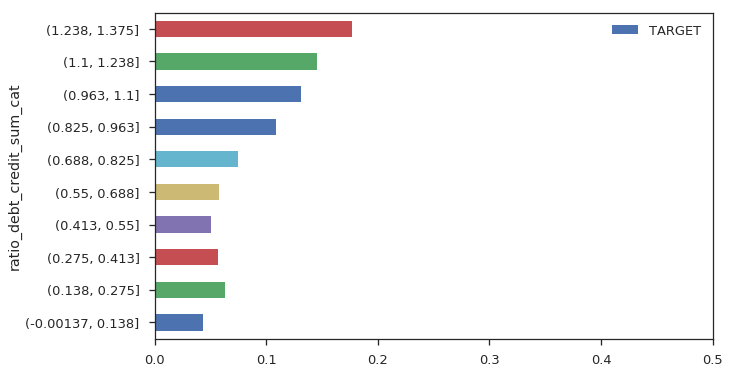

In [130]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ    = x[flds].groupby('ratio_debt_credit_sum_cat', as_index=False).mean()
summ.plot('ratio_debt_credit_sum_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

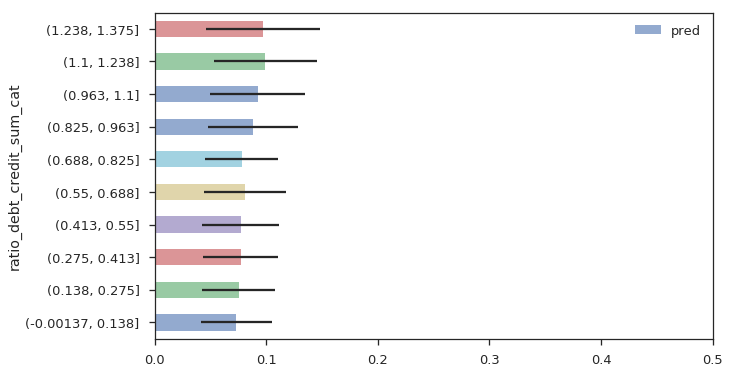

In [131]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('ratio_debt_credit_sum_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### EXT_2_3_div

In [140]:
mask = X_valid.EXT_2_3_div < 1.3

x                  = X_valid[mask].copy()
x.loc[:, 'TARGET'] = y_valid[mask]

x['pred_std'] = np.std(preds, axis=0)[mask.values]
x['pred']     = np.mean(preds, axis=0)[mask.values]

x.loc[:, 'EXT_2_3_div_cat'] = pd.cut(x.EXT_2_3_div, bins=10)

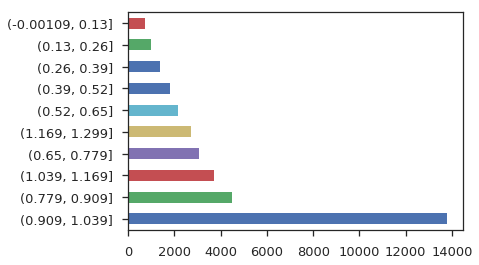

In [141]:
x.EXT_2_3_div_cat.value_counts().plot.barh();

In [142]:
flds = ['EXT_2_3_div_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('EXT_2_3_div_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

EXT_2_3_div_cat    TARGET               pred  pred_std
                         mean      len      mean      mean
0  (-0.00109, 0.13]  0.198853    734.0  0.136453  0.080051
1      (0.13, 0.26]  0.120789   1002.0  0.109233  0.057674
2      (0.26, 0.39]  0.106873   1366.0  0.094514  0.046385
3      (0.39, 0.52]  0.084167   1818.0  0.084784  0.038263
4      (0.52, 0.65]  0.080444   2176.0  0.077707  0.033157
5     (0.65, 0.779]  0.066772   3054.0  0.070891  0.029218
6    (0.779, 0.909]  0.043915   4508.0  0.067008  0.026942
7    (0.909, 1.039]  0.076660  13792.0  0.079042  0.031265
8    (1.039, 1.169]  0.046051   3692.0  0.067200  0.027640
9    (1.169, 1.299]  0.050415   2696.0  0.069162  0.028453

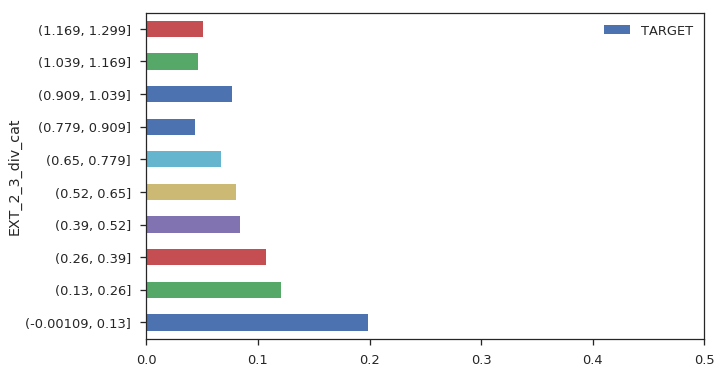

In [143]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ    = x[flds].groupby('EXT_2_3_div_cat', as_index=False).mean()
summ.plot('EXT_2_3_div_cat', 'TARGET', 'barh', xlim=(0,.5), ax=ax);

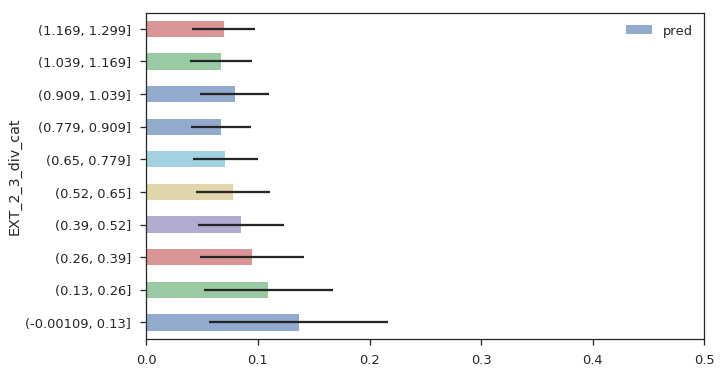

In [144]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('EXT_2_3_div_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### AMT_GOODS_PRICE

In [145]:
x                  = X_valid.copy()
x.loc[:, 'TARGET'] = y_valid

x['pred_std'] = np.std(preds, axis=0)
x['pred']     = np.mean(preds, axis=0)

x.loc[:, 'AMT_GOODS_PRICE_cat'] = pd.cut(x.AMT_GOODS_PRICE, bins=10)

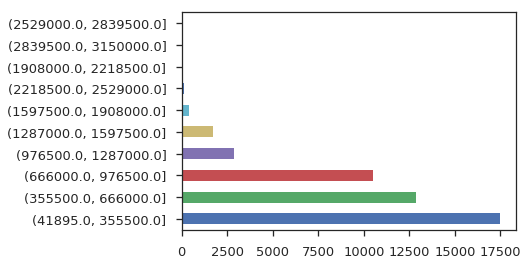

In [146]:
x.AMT_GOODS_PRICE_cat.value_counts().plot.barh();

In [147]:
flds = ['AMT_GOODS_PRICE_cat', 'TARGET', 'pred', 'pred_std']
summ = x[flds].groupby('AMT_GOODS_PRICE_cat', as_index=False).agg({'TARGET': [np.mean, len],
                                                                      'pred': np.mean,
                                                                      'pred_std': np.mean
                                                                     })
summ

AMT_GOODS_PRICE_cat    TARGET               pred  pred_std
                               mean      len      mean      mean
0     (41895.0, 355500.0]  0.080566  17488.0  0.083824  0.036562
1    (355500.0, 666000.0]  0.099487  12864.0  0.084205  0.037143
2    (666000.0, 976500.0]  0.070435  10504.0  0.076892  0.033146
3   (976500.0, 1287000.0]  0.058014   2896.0  0.072470  0.030977
4  (1287000.0, 1597500.0]  0.038422   1744.0  0.068959  0.029206
5  (1597500.0, 1908000.0]  0.039825    427.0  0.067514  0.028818
6  (1908000.0, 2218500.0]  0.045441     66.0  0.064291  0.027338
7  (2218500.0, 2529000.0]  0.033600    119.0  0.062320  0.026932
8  (2529000.0, 2839500.0]  0.500000      2.0  0.068694  0.026053
9  (2839500.0, 3150000.0]  0.000000      5.0  0.051609  0.019888

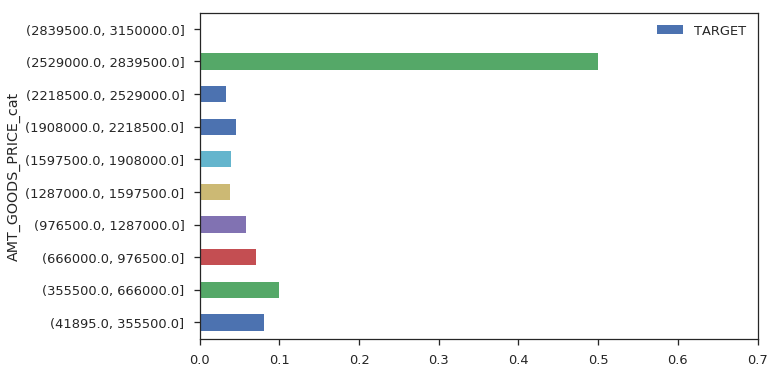

In [150]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ    = x[flds].groupby('AMT_GOODS_PRICE_cat', as_index=False).mean()
summ.plot('AMT_GOODS_PRICE_cat', 'TARGET', 'barh', xlim=(0,.7), ax=ax);

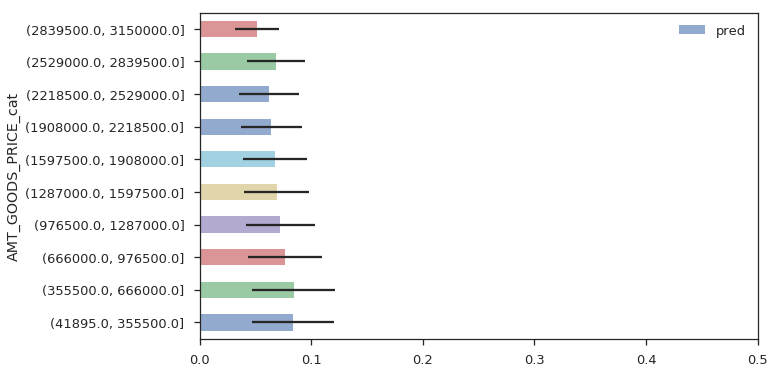

In [151]:
fig, ax = plt.subplots(1, figsize=(10, 6))
summ.plot('AMT_GOODS_PRICE_cat', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0, 0.5), ax=ax);

#### Feature Importance

In [156]:
fi = rf_feat_importance(m, X_train); fi[:10]

,cols,imp
128,EXT_2_3_mean,0.067076
117,MEAN_EXTERNAL_SCORE,0.048201
38,EXT_SOURCE_3,0.046645
118,EXT_3_2,0.045087
426,ratio_annuity_credit_ext_source_3,0.035122
431,ext_2_age,0.032044
422,ratio_annuity_credit_ext_source_2,0.031682
122,EXT_1_3_sum,0.024039
123,EXT_2_3_sum,0.023064
421,mult_annuity_credit_ext_source_2,0.022150


### LightGBM

In [14]:
columns = list(set(train_sub.columns) - set(COLS_TO_REMOVE)) # Final set of features

X_train, X_valid, y_train, y_valid = train_test_split(train_sub.loc[:, columns], 
                                                      train_sub.TARGET, 
                                                      test_size=.25, 
                                                      random_state=SEED)

Previous parameters tried for LGB

```
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .1,
        'max_depth': 5,
        'num_leaves': 10,
        'sub_feature': .2,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }
```

In [15]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .1,
        'max_depth': 8,
        'num_leaves': 15,
        'sub_feature': .2,
        'sub_row': 1.,
        'min_data_in_leaf': 50,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED + 100
    }

#### CV

In [16]:
def do_cv(X_train, y_train, params, columns):    
    t0 = time.time()

    num_boost_round       = 200
    early_stopping_rounds = 40

    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    cv     = lgb.cv(params, 
                    ltrain, 
                    num_boost_round=num_boost_round, 
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=20
                   )

    print('\nTook: {} seconds'.format(time.time() - t0))
    
    return pd.DataFrame(cv), params

In [17]:
cv_history, params = do_cv(X_train, y_train, params, columns)

[20]	cv_agg's auc: 0.752183 + 0.00377797
[40]	cv_agg's auc: 0.765706 + 0.00346737
[60]	cv_agg's auc: 0.772201 + 0.0031339
[80]	cv_agg's auc: 0.776253 + 0.00310554
[100]	cv_agg's auc: 0.777865 + 0.00298711
[120]	cv_agg's auc: 0.778763 + 0.00302617
[140]	cv_agg's auc: 0.779331 + 0.00335818
[160]	cv_agg's auc: 0.779912 + 0.00351598
[180]	cv_agg's auc: 0.779997 + 0.00314898
[200]	cv_agg's auc: 0.779833 + 0.00336216

Took: 37.36656951904297 seconds


In [18]:
cv_history.iloc[-1]

auc-mean    0.780055
auc-stdv    0.003071
Name: 182, dtype: float64

#### Hyper-parameter Tuning

In [16]:
def tune_lgb_model(X_train, y_train, X_valid, y_valid, columns, params, num_boost_round, early_stopping_rounds):
    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    leval  = lgb.Dataset(X_valid, y_valid, feature_name=columns)
    
    model  = lgb.train(params, 
                       ltrain, 
                       num_boost_round, 
                       valid_sets=[ltrain, leval], 
                       valid_names=['train', 'eval'],
                       early_stopping_rounds=early_stopping_rounds,
                       verbose_eval=20
                      )
    
    return model

In [17]:
m = tune_lgb_model(X_train, 
                   y_train, 
                   X_valid, 
                   y_valid, 
                   columns, 
                   params, 
                   num_boost_round=1000, 
                   early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[20]	train's auc: 0.768215	eval's auc: 0.751614
[40]	train's auc: 0.787706	eval's auc: 0.765809
[60]	train's auc: 0.801104	eval's auc: 0.772282
[80]	train's auc: 0.812069	eval's auc: 0.776235
[100]	train's auc: 0.821957	eval's auc: 0.78029
[120]	train's auc: 0.830033	eval's auc: 0.781231
[140]	train's auc: 0.83797	eval's auc: 0.782481
[160]	train's auc: 0.844554	eval's auc: 0.782688
[180]	train's auc: 0.85133	eval's auc: 0.783489
[200]	train's auc: 0.857475	eval's auc: 0.7841
[220]	train's auc: 0.86306	eval's auc: 0.784207
[240]	train's auc: 0.868956	eval's auc: 0.784495
[260]	train's auc: 0.874372	eval's auc: 0.784706
[280]	train's auc: 0.879589	eval's auc: 0.784756
[300]	train's auc: 0.884242	eval's auc: 0.784995
[320]	train's auc: 0.888784	eval's auc: 0.784775
[340]	train's auc: 0.893257	eval's auc: 0.784591
Early stopping, best iteration is:
[306]	train's auc: 0.885492	eval's auc: 0.78504


`[312]	train's auc: 0.88815	eval's auc: 0.785135`

In [42]:
def feat_importance(feat_imp, columns): return pd.DataFrame({'feat': columns, 'imp': feat_imp}).sort_values(by='imp', ascending=False)
fi = feat_importance(m.feature_importance(), m.feature_name())

In [23]:
fi[fi.feat == 'sum_to_duration']

,feat,imp
367,sum_to_duration,11


In [43]:
fi.iloc[:30]

,feat,imp
48,ratio_annuity_credit,41
248,ratio_debt_credit_sum,33
172,EXT_SOURCE_2,26
265,AMT_PAYMENT_sum,26
190,past_annuity_to_credit_cnt_payment_max,23
78,past_annuity_to_credit_cnt_payment_median,23
277,mean_diff_actual_decided_amount,22
160,diff_credit_goods,22
289,AMT_PAYMENT_median,21
3,mult_annuity_credit_ext_source_3,21


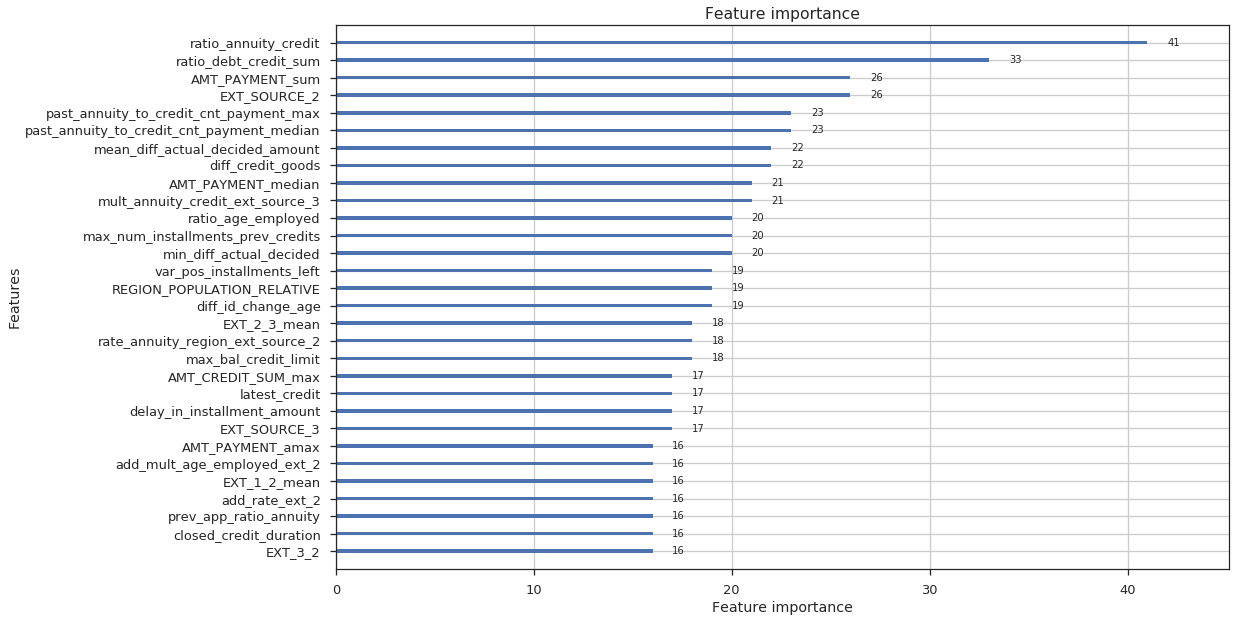

In [44]:
fig, ax = plt.subplots(1, figsize=(16, 10))
lgb.plot_importance(m, max_num_features=30, ax=ax);

## Full CV

Previous params

```
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .03,
        'max_depth': 3,
        'num_leaves': 40,
        'sub_feature': .1,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }
```

In [22]:
params = {
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'learning_rate': .1,
         'max_depth': 8,
         'num_leaves': 35,
         'sub_feature': .2,
         'sub_row': 1.,
         'min_data_in_leaf': 50,
         'reg_lambda': 100,
         'max_bin': 300,
         'min_gain_to_split': 0.5,
         'metric': 'auc',
         'nthread': 4,
         'verbose': -1,
         'seed': SEED
       }

In [23]:
def do_full_cv(X_train, y_train, params, columns):    
    t0 = time.time()

    num_boost_round       = 5000
    early_stopping_rounds = 100

    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    cv     = lgb.cv(params, 
                    ltrain, 
                    num_boost_round=num_boost_round, 
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=20
                   )

    print('\nTook: {} seconds'.format(time.time() - t0))
    
    return pd.DataFrame(cv), params

In [24]:
columns = list(set(train.columns) - set(COLS_TO_REMOVE))

X_train = train.loc[:, columns]
y_train = train.loc[:, 'TARGET']

In [ ]:
cv_history, params = do_full_cv(X_train, y_train, params, columns)

[20]	cv_agg's auc: 0.760685 + 0.00380337
[40]	cv_agg's auc: 0.772501 + 0.00371983
[60]	cv_agg's auc: 0.778942 + 0.00365505
[80]	cv_agg's auc: 0.783065 + 0.00338808
[100]	cv_agg's auc: 0.785763 + 0.00308329
[120]	cv_agg's auc: 0.787556 + 0.00282858
[140]	cv_agg's auc: 0.788808 + 0.00273081
[160]	cv_agg's auc: 0.789642 + 0.0026692
[180]	cv_agg's auc: 0.790433 + 0.00254021
[200]	cv_agg's auc: 0.791038 + 0.00270283
[220]	cv_agg's auc: 0.791386 + 0.00272452
[240]	cv_agg's auc: 0.791591 + 0.00271404
[260]	cv_agg's auc: 0.791744 + 0.00276986
[280]	cv_agg's auc: 0.792021 + 0.00285568
[300]	cv_agg's auc: 0.792181 + 0.00292183
[320]	cv_agg's auc: 0.792085 + 0.00311932
[340]	cv_agg's auc: 0.792133 + 0.00302703
[360]	cv_agg's auc: 0.792186 + 0.0031234
[380]	cv_agg's auc: 0.792172 + 0.00323729
[400]	cv_agg's auc: 0.792043 + 0.00332783
[420]	cv_agg's auc: 0.791938 + 0.003264


`[613]	cv_agg's auc: 0.793500 + 0.002641`

`[1550]	cv_agg's auc: 0.79543 + 0.00311892`

In [63]:
cv_history.iloc[-1]

auc-mean    0.793500
auc-stdv    0.002641
Name: 613, dtype: float64

In [ ]:
# save model_params to disk
joblib.dump(params, os.path.join(basepath, f'models/{MODEL_FILENAME}_model_params.pkl'))

## Training ( Holdout )

In [33]:
columns = list(set(train.columns) - set(COLS_TO_REMOVE))

X_train, X_val, y_train, y_val = train_test_split(train.loc[:, columns], 
                                                  train.TARGET, 
                                                  test_size=.3, 
                                                  random_state=SEED)

In [34]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, len(columns)

((215257, 400), (92254, 400), (215257,), (92254,), 400)

### Hyper-parameter Tuning

In [42]:
params = {
         'boosting_type': 'gbdt',
         'objective': 'binary',
         'learning_rate': .1,
         'num_leaves': 20,
         'sub_feature': .1,
         'sub_row': 1.,
         'min_data_in_leaf': 50,
         'reg_lambda': 100,
         'max_bin': 300,
         'min_gain_to_split': 0.5,
         'metric': 'auc',
         'nthread': 4,
         'verbose': -1,
         'seed': SEED + 10
       }

In [43]:
num_boost_round       = 5000
early_stopping_rounds = 40

ltrain     = lgb.Dataset(X_train, y_train, feature_name=columns)
leval      = lgb.Dataset(X_val, y_val, feature_name=columns)
m          = lgb.train(params, 
                       ltrain, 
                       num_boost_round, 
                       valid_sets=[ltrain, leval], 
                       valid_names=['train', 'eval'],
                       early_stopping_rounds=early_stopping_rounds,
                       verbose_eval=20
                      )

Training until validation scores don't improve for 40 rounds.
[20]	train's auc: 0.765367	eval's auc: 0.752185
[40]	train's auc: 0.78178	eval's auc: 0.76515
[60]	train's auc: 0.792112	eval's auc: 0.772756
[80]	train's auc: 0.798886	eval's auc: 0.77699
[100]	train's auc: 0.804657	eval's auc: 0.779977
[120]	train's auc: 0.809446	eval's auc: 0.782327
[140]	train's auc: 0.8137	eval's auc: 0.783809
[160]	train's auc: 0.817459	eval's auc: 0.785011
[180]	train's auc: 0.821095	eval's auc: 0.786013
[200]	train's auc: 0.824511	eval's auc: 0.786986
[220]	train's auc: 0.827627	eval's auc: 0.787431
[240]	train's auc: 0.830481	eval's auc: 0.787999
[260]	train's auc: 0.833305	eval's auc: 0.788422
[280]	train's auc: 0.835765	eval's auc: 0.78856
[300]	train's auc: 0.838408	eval's auc: 0.788683
[320]	train's auc: 0.840694	eval's auc: 0.788862
[340]	train's auc: 0.843	eval's auc: 0.78889
[360]	train's auc: 0.845168	eval's auc: 0.788828
Early stopping, best iteration is:
[328]	train's auc: 0.841663	eval's 

`[328]	train's auc: 0.841663	eval's auc: 0.788991`

## Full Training

In [15]:
t0 = time.time()

# parameters obtained after hyper-parameter tuning
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .03 / 1.2,
        'num_leaves': 35,
        'sub_feature': .2,
        'sub_row': 1.,
        'min_data_in_leaf': 50,
        'reg_lambda': 100,
        'max_bin': 300,
        'min_gain_to_split': 0.5,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }

num_boost_round = int(len(cv_history) * 1.2)

X = train.loc[:, columns]
y = train.loc[:, 'TARGET']

Xtest = test.loc[:, columns]

ltrain = lgb.Dataset(X, y, feature_name=columns)
m      = lgb.train(params, ltrain, num_boost_round)
preds  = m.predict(Xtest)

sub_identifier = "%s-%s-%.5f" % (datetime.datetime.now().strftime('%Y%m%d-%H%M'), MODEL_FILENAME, cv_history.iloc[-1]['auc-mean'])

sub            = pd.read_csv(os.path.join(basepath, 'data/raw/sample_submission.csv.zip'))
sub['TARGET']  = preds

sub.to_csv(os.path.join(basepath, 'submissions/%s.csv'%(sub_identifier)), index=False)

print('\n Took: {} seconds'.format(time.time() - t0))


 Took: 761.4048802852631 seconds
